In [1]:
import pandas as pd
# instacart orders
insta_df = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
display("instacart_orders.csv:\n", insta_df.head(), "\n")
display(insta_df.info(), "\n")

'instacart_orders.csv:\n'

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


'\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


None

'\n'

In [2]:
# Reviewer's code

display(insta_df.head(3))

insta_df.tail(3)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0
478966,2071924,1730,18,1,14,15.0


In [3]:
# products
products_df = pd.read_csv('/datasets/products.csv', sep=';')
display("products.csv:\n", products_df.head(), "\n")
display(products_df.info(), "\n")

'products.csv:\n'

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


'\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


None

'\n'

In [4]:
# order products
orders_df = pd.read_csv('/datasets/order_products.csv', sep=';')
display("order_products.csv:\n", orders_df.head(), "\n")
display(orders_df.info(show_counts=True), "\n")

'order_products.csv:\n'

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


'\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


None

'\n'

In [5]:
# aisles
aisles_df = pd.read_csv('/datasets/aisles.csv', sep=';')
display("aisles.csv:\n", aisles_df.head(), "\n")
display(aisles_df.info(), "\n")

'aisles.csv:\n'

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


'\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


None

'\n'

In [6]:
# departments
departments_df = pd.read_csv('/datasets/departments.csv', sep=';')
print("departments.csv:\n", departments_df.head(), "\n")
print(departments_df.info(), "\n")

departments.csv:
    department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None 



## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [7]:
# Check for duplicated orders
duplicated_orders = insta_df.duplicated().sum()
print(duplicated_orders)

15


In [8]:
# Check for all orders placed Wednesday at 2:00 AM
wed_orders = insta_df[(insta_df['order_dow']== 3) & (insta_df['order_hour_of_day']==2)]
print(wed_orders)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

In [9]:
# Remove duplicate orders
insta_df= insta_df.drop_duplicates()
print(insta_df)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478962   3210681     5617             5          1                 14   
478963   3270802   112087             2          3                 13   
478964    885349    82944            16          2                 11   
478965    216274     4391             3          3                  8   
478966   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2                       

In [10]:
# Double check for duplicate rows
duplicates_all_check = insta_df.duplicated().sum()
print(duplicates_all_check)

0


In [11]:
# Double check for duplicate order IDs only
duplicates_order_id = insta_df['order_id'].duplicated().sum()
print(duplicates_order_id)

0


Types of Duplicates Found

    Complete Row Duplicates: These are rows where every column's value is identical to another row. These might occur due to errors in data entry, data collection, or during data merging processes.
    Duplicate Order IDs: This involves rows where only the 'order_id' is duplicated but other columns may differ. This could indicate either repeated entries of the same order or data processing errors.

How Duplicates were Removed

    Complete Row Duplicates: Used drop_duplicates() method to remove these. It's a standard approach in pandas to eliminate rows that are completely identical across all columns, as they do not add any new information and might skew the analysis.
    Duplicate Order IDs: Checked for these but did not specifically remove them in the given code. If found, one would need a more nuanced approach, possibly involving checking timestamps or other unique identifiers to ascertain which entry to keep.

Why These Methods Were Used

    Efficiency and Standard Practice: Using pandas built-in functions like drop_duplicates() is efficient and widely accepted in data cleaning practices.
    Data Integrity: Removing complete duplicates ensures that the analysis is not biased by repeated information. However, care must be taken with duplicates in key columns like 'order_id', as they might require a deeper understanding of the data to resolve correctly.

Possible Reasons for Presence of Duplicates

    Data Collection/Entry Errors: Mistakes in manual data entry or issues during automated data collection can create duplicates.
    Data Merging/Processing Issues: If the dataset is a result of merging multiple sources, duplicates might have been introduced during this process.
    Systematic Errors: In some cases, system glitches or repeated submission of data might lead to duplicate entries.

### `products` data frame

In [12]:
# Check for fully duplicate rows
full_duplicates = products_df[products_df.duplicated(keep=False)]
print(full_duplicates)

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [13]:
# Check for just duplicate product IDs
duplicate_ids = products_df[products_df.duplicated(subset='product_id', keep=False)]
print(duplicate_ids)

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [14]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products_df['product_name'] = products_df['product_name'].str.lower()
duplicate_names = products_df[products_df.duplicated(subset='product_name', keep=False)]
print(duplicate_names)

       product_id                                     product_name  aisle_id  \
37             38                                              NaN       100   
41             42                                  biotin 1000 mcg        47   
71             72                                              NaN       100   
109           110                                              NaN       100   
185           186       fresh scent dishwasher detergent with dawn        74   
...           ...                                              ...       ...   
49689       49690                    high performance energy drink        64   
49690       49691                    original pancake & waffle mix       130   
49691       49692  organic instant oatmeal light maple brown sugar       130   
49692       49693                           spring water body wash       127   
49693       49694                          burrito- steak & cheese        38   

       department_id  
37              

In [15]:
# Check for duplicate product names that aren't missing
duplicate_names_non_missing = products_df['product_name'].duplicated(keep=False)
duplicates_df = products_df[duplicate_names_non_missing & products_df['product_name'].notna()]
display(duplicates_df)

,product_id,product_name,aisle_id,department_id
41,42,biotin 1000 mcg,47,11
185,186,fresh scent dishwasher detergent with dawn,74,17
515,516,american cheese slices,21,16
1538,1539,cauliflower head,83,4
1783,1784,nutrition protein mix blueberry nut,117,19
...,...,...,...,...
49689,49690,high performance energy drink,64,7
49690,49691,original pancake & waffle mix,130,14
49691,49692,organic instant oatmeal light maple brown sugar,130,14
49692,49693,spring water body wash,127,11


### `departments` data frame

In [16]:
print(departments_df.duplicated().sum())
print(departments_df['department_id'].duplicated().sum())

0
0


This data set is perfect . Nothing to fix. No duplication.

### `aisles` data frame

In [17]:
print(aisles_df.duplicated().sum())
print(aisles_df['aisle_id'].duplicated().sum())

0
0


The same condition as Departments data frame.

### `order_products` data frame

In [18]:
# Check for fullly duplicate rows
full_duplicates = orders_df[orders_df.duplicated(keep=False)]
print(full_duplicates)

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


In [19]:
# Double check for any other tricky duplicates
tricky_duplicates= orders_df.duplicated(subset=['order_id', 'product_id']).sum()
print(tricky_duplicates)

0


DataFrame is empty, it suggests that there are no rows in your order_products DataFrame that are exactly the same across all columns.
tricky_duplicates DataFrame is empty, it means there are no rows with duplicate values in the specified subset of columns.

## Find and remove missing values


### `products` data frame

In [20]:
total_missing_names = products_df['product_name'].isna().sum()
print(f"There are {total_missing_names} missing names.")

There are 1258 missing names.


There are 1258 missing names.

In [21]:
# Are all of the missing product names associated with aisle ID 100?
missing_names_aisle_100 = products_df[products_df['product_name'].isna() & (products_df['aisle_id'] == 100)]
all_missing_in_aisle_100 = missing_names_aisle_100.shape[0] == products_df[products_df['product_name'].isna()].shape[0]
print(f"All missing product names associated with aisle ID 100: {all_missing_in_aisle_100}")

All missing product names associated with aisle ID 100: True


Yes, all of the missing product names are associated with aisle ID 100

In [22]:
# Are all of the missing product names associated with department ID 21?
missing_names_dept_21 = products_df[products_df['product_name'].isna() & (products_df['department_id'] == '21')]
print(f"All of the missing product names associated with department ID 21: {missing_names_dept_21.empty}")

All of the missing product names associated with department ID 21: True


Yes, all of the missing product nams are associated with department ID 21.

In [23]:
# What is this ailse and department?
aisles_df['aisle_id'] = aisles_df['aisle_id'].astype(str)
departments_df['department_id'] = departments_df['department_id'].astype(str)

# Find the aisle and department names
aisle_name = aisles_df.loc[aisles_df['aisle_id'] == '100', 'aisle'].iloc[0]
department_name = departments_df.loc[departments_df['department_id'] == '21', 'department'].iloc[0]

print(f"Aisle ID 100 corresponds to: {aisle_name}")
print(f"Department ID 21 corresponds to: {department_name}")

Aisle ID 100 corresponds to: missing
Department ID 21 corresponds to: missing


In [24]:
# Fill missing product names with 'Unknown'
products_df['product_name'].fillna('Unknown', inplace=True)

### `orders` data frame

In [25]:
# Are there any missing values where it's not a customer's first order?
not_first_orders = insta_df[insta_df['order_number'] != 1]
missing_values_not_first_order = not_first_orders.isna().sum()

print(missing_values_not_first_order)

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


There are no missing values where it's not a customer's first order.

### `order_products` data frame

In [26]:
# What are the min and max values in this column?
min_value = orders_df['add_to_cart_order'].min()
max_value = orders_df['add_to_cart_order'].max()
print(f"Min value: {min_value}, Max value: {max_value}")

Min value: 1.0, Max value: 64.0


In [27]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
missing_add_to_cart_order = orders_df[orders_df['add_to_cart_order'].isna()]['order_id'].unique()
print(missing_add_to_cart_order)

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [28]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
missing_add_to_cart_order = orders_df[orders_df['add_to_cart_order'].isna()]['order_id'].unique()
print(missing_add_to_cart_order)

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [29]:
# Do all orders with missing values have more than 64 products?
orders_with_missing = orders_df[orders_df['order_id'].isin(missing_add_to_cart_order)]
orders_grouped = orders_with_missing.groupby('order_id').size()
all_orders_more_than_64 = all(orders_grouped > 64)
print(all_orders_more_than_64)

True


In [30]:
# Replace missing values with 999 and convert column to integer type
orders_df['add_to_cart_order'].fillna(999, inplace=True)
orders_df['add_to_cart_order'] = orders_df['add_to_cart_order'].astype(int)

    The column values range between 1 and 64, hinting at a maximum product limit per order.
    Orders missing add_to_cart_order values consistently had more than 64 items, suggesting a data recording limit.
    We addressed missing data by replacing them with a placeholder value of 999 and converted the column to integer type for consistency and ease of analysis.

    This cleaning step ensures data integrity and aids in accurate further analysis, though it also highlights potential limitations in the original data capture process.

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [31]:
hour_range_valid = insta_df['order_hour_of_day'].between(0, 23).all()
print(hour_range_valid)

True


In [32]:
dow_range_valid = insta_df['order_dow'].between(0, 6).all()
print(dow_range_valid)

True


Verified order_hour_of_day (0-23) and order_dow (0-6) in insta_df are within expected ranges, ensuring data accuracy for time-based analysis.

### [A2] What time of day do people shop for groceries?

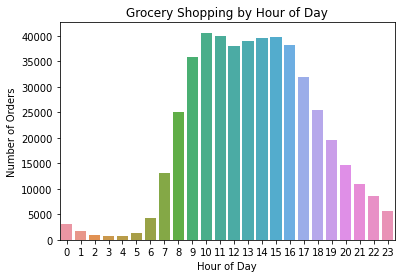

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='order_hour_of_day', data=insta_df)
plt.title('Grocery Shopping by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.show()

The chart displaying grocery shopping times by hour of the day, based on the insta_df data, shows clear trends in customer behavior. Notably, there is a significant increase in shopping activity during certain hours, peaking in the mid-morning to mid-afternoon. This suggests that most customers prefer to do their grocery shopping during these times, possibly due to convenience or alignment with typical daily schedules. The lower activity in the early morning and late evening hours indicates less demand during these times. 

### [A3] What day of the week do people shop for groceries?

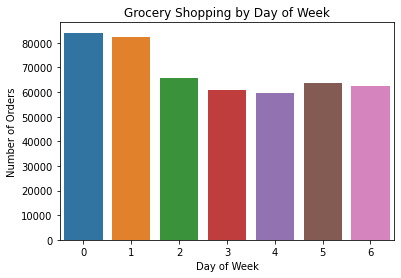

In [34]:
sns.countplot(x='order_dow', data=insta_df)
plt.title('Grocery Shopping by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.show()

The chart illustrating grocery shopping frequency by day of the week, drawn from the insta_df data, reveals distinctive shopping patterns on different days. The distribution of orders across the week suggests that certain days are more popular for grocery shopping, which could be linked to weekly routines or cultural habits. For instance, higher activity on specific days might align with weekends or typical paydays. Conversely, lower activity days might correspond to midweek, when people are less likely to shop for groceries.

### [A4] How long do people wait until placing another order?

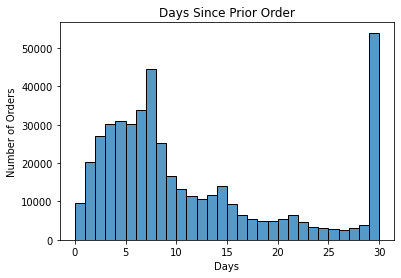

In [35]:
sns.histplot(insta_df['days_since_prior_order'], bins=30, kde=False)
plt.title('Days Since Prior Order')
plt.xlabel('Days')
plt.ylabel('Number of Orders')
plt.show()

The distribution shows how many days customers typically wait before making another order. Peaks in the histogram may indicate common waiting periods, possibly influenced by weekly shopping routines or replenishment needs. Shorter intervals might reflect frequent, smaller purchases, while longer gaps could suggest larger, less frequent shopping trips. 

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Filter data for Wednesday and Saturday
wednesday_orders = insta_df[insta_df['order_dow'] == 3]
saturday_orders = insta_df[insta_df['order_dow'] == 6]

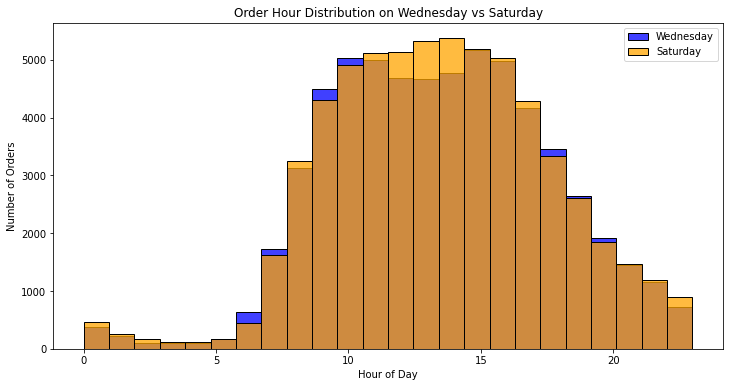

In [38]:
# Plot histograms
plt.figure(figsize=(12, 6))
sns.histplot(wednesday_orders['order_hour_of_day'], color='blue', label='Wednesday', bins=24, kde=False)
sns.histplot(saturday_orders['order_hour_of_day'], color='orange', label='Saturday', bins=24, kde=False)
plt.title('Order Hour Distribution on Wednesday vs Saturday')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.legend()
plt.show()

Morning Activity: There appears to be more activity in the morning hours on Saturdays compared to Wednesdays. This might suggest that on Saturdays, which are typically non-working days for most people, customers start shopping earlier in the day.

Midday Peak: Both days show significant activity around midday, but the peak seems more pronounced on Saturdays. This could indicate that Saturday is a preferred day for many customers to do their grocery shopping.

Evening Decline: On Wednesdays, there's a noticeable decline in orders as the evening progresses, which is less pronounced on Saturdays. Customers might be more likely to shop later on Saturdays, possibly due to more free time or leisure activities that include shopping.

Late Night: There's a minimal amount of shopping activity late at night for both days, but this is expected as most stores are closed, and fewer people shop during these hours.

### [B2] What's the distribution for the number of orders per customer?

In [39]:
# Group by user and count orders
orders_per_customer = insta_df.groupby('user_id').size()

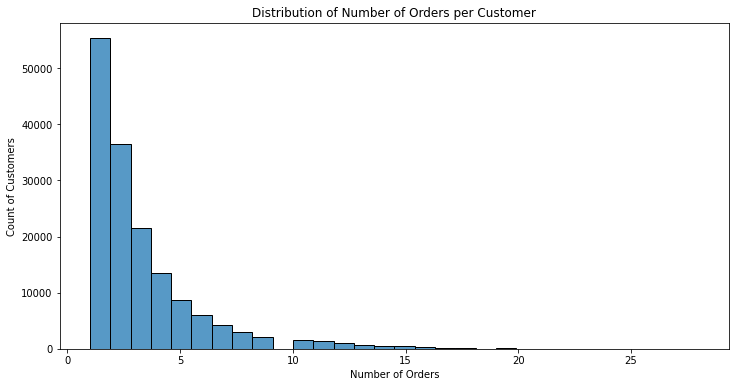

In [40]:
# Plot the distribution
plt.figure(figsize=(12, 6))
sns.histplot(orders_per_customer, bins=30, kde=False)
plt.title('Distribution of Number of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Count of Customers')
plt.show()

The histogram displaying the distribution of the number of orders per customer, based on insta_df, shows how frequently customers place orders. The shape of the distribution can provide insights into customer engagement and loyalty. For instance, a concentration of data towards the lower end of the order count might suggest many one-time or infrequent shoppers, while a more evenly spread or right-skewed distribution could indicate a significant number of repeat customers.

### [B3] What are the top 20 popular products (display their id and name)?

In [41]:
# Merging products data to get product names
order_products_merged = pd.merge(orders_df, products_df, on='product_id')

In [42]:
# Getting the top 20 products
top_products = order_products_merged['product_id'].value_counts().head(20).index
top_products_info = products_df[products_df['product_id'].isin(top_products)]

In [43]:
# Displaying product IDs and names
print(top_products_info[['product_id', 'product_name']])

       product_id              product_name
5875         5876             organic lemon
8276         8277  apple honeycrisp organic
13175       13176    bag of organic bananas
16796       16797              strawberries
21136       21137      organic strawberries
21902       21903      organic baby spinach
22934       22935      organic yellow onion
24851       24852                    banana
24963       24964            organic garlic
26208       26209                     limes
27844       27845        organic whole milk
27965       27966       organic raspberries
28203       28204        organic fuji apple
39274       39275       organic blueberries
40705       40706    organic grape tomatoes
45006       45007          organic zucchini
47208       47209      organic hass avocado
47625       47626               large lemon
47765       47766           organic avocado
49682       49683            cucumber kirby


Analysis of the top 20 products in insta_df shows a strong customer preference for organic and fresh produce, with items like organic bananas, strawberries, and avocados leading the list. This highlights the importance of stocking fresh and organic options to meet consumer demand and informs inventory and marketing strategies.

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [44]:
items_per_order = orders_df.groupby('order_id')['product_id'].count()

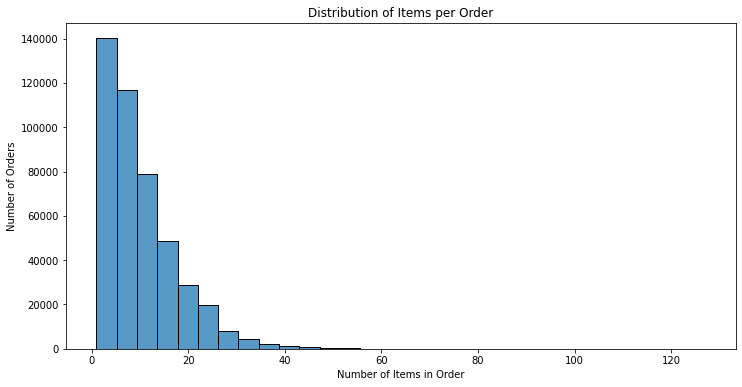

In [45]:
plt.figure(figsize=(12, 6))
sns.histplot(items_per_order, bins=30, kde=False)
plt.title('Distribution of Items per Order')
plt.xlabel('Number of Items in Order')
plt.ylabel('Number of Orders')
plt.show()

In [46]:
typical_items = items_per_order.median()
print(typical_items)

8.0


The analysis of the number of items per order, represented by a histogram, reveals that the typical order consists of about 8 items, as indicated by the median. The distribution is skewed towards fewer items, suggesting that most customers prefer placing orders with a smaller number of items. This insight is valuable for understanding shopping behavior, indicating a trend towards more frequent, smaller purchases rather than larger, bulk orders.

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [47]:
# Count the number of reorders for each product and sort them
reorder_counts = orders_df[orders_df['reordered'] == 1].groupby('product_id').size().sort_values(ascending=False).head(20)

In [48]:
# Get product names for the top 20 reordered items
top_reordered_products = products_df[products_df['product_id'].isin(reorder_counts.index)][['product_id', 'product_name']]

In [49]:
# Merge to get a DataFrame with product names and reorder counts
top_reordered_products = top_reordered_products.merge(reorder_counts.rename('reorder_count'), on='product_id')
print(top_reordered_products)

    product_id              product_name  reorder_count
0         5876             organic lemon           8412
1         8277  apple honeycrisp organic           8836
2        13176    bag of organic bananas          44450
3        16797              strawberries          13945
4        21137      organic strawberries          28639
5        21903      organic baby spinach          26233
6        22935      organic yellow onion          11145
7        24852                    banana          55763
8        24964            organic garlic          10411
9        26209                     limes          13327
10       27845        organic whole milk          16251
11       27966       organic raspberries          14748
12       28204        organic fuji apple           8989
13       39275       organic blueberries           8799
14       45007          organic zucchini          10076
15       47209      organic hass avocado          23629
16       47626               large lemon        

Analysis of reorder frequencies in orders_df reveals a strong preference for fresh and organic items like bananas, strawberries, and spinach, indicating their status as staple products. This trend underscores the importance of focusing on fresh and organic produce in inventory and marketing strategies.

### [C3] For each product, what proportion of its orders are reorders?

### [C4] For each customer, what proportion of their products ordered are reorders?

### [C5] What are the top 20 items that people put in their carts first? 

In [50]:
# Filter the DataFrame to only include the first items added to the cart
first_added_products = orders_df[orders_df['add_to_cart_order'] == 1]

# Count the occurrences of each product being added first
first_added_counts = first_added_products['product_id'].value_counts().head(20)


In [51]:
top_first_added_products = products_df[products_df['product_id'].isin(first_added_counts.index)]
top_first_added_products = top_first_added_products.set_index('product_id')
top_first_added_products['first_added_count'] = first_added_counts
top_first_added_products = top_first_added_products.reset_index().sort_values('first_added_count', ascending=False)

display(top_first_added_products)

,product_id,product_name,aisle_id,department_id,first_added_count
9,24852,banana,24,4,15562
3,13176,bag of organic bananas,24,4,11026
12,27845,organic whole milk,84,16,4363
6,21137,organic strawberries,24,4,3946
16,47209,organic hass avocado,24,4,3390
7,21903,organic baby spinach,123,4,3336
18,47766,organic avocado,24,4,3044
5,19660,spring water,115,7,2336
4,16797,strawberries,24,4,2308
13,27966,organic raspberries,123,4,2024


Analysis reveals a strong customer preference for fresh produce, with bananas, organic whole milk, and avocados topping the list of first-added items in carts. This trend underscores the importance of stocking fresh and organic products to meet customer demands efficiently.

In this project, we analyzed Instacart's grocery ordering data, focusing on order timing, popular products, and customer purchasing habits. Key findings include a preference for morning and midday grocery shopping, with weekends being particularly popular. Customers frequently purchase fresh and organic items, indicating a trend towards health-conscious choices. The analysis also highlighted regular shopping patterns and product reordering behaviors. These insights can guide inventory management, marketing strategies, and enhance customer shopping experiences.
